In [1]:
#import neccessary libraries
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#load data from file
X_train = np.load('X_train.npy',allow_pickle=True)
y_train = np.load('y_train.npy',allow_pickle=True)
X_test = np.load('X_test.npy',allow_pickle=True)
y_test = np.load('y_test.npy',allow_pickle=True)
#X_valid = np.load('X_valid.npy',allow_pickle=True)
#y_valid = np.load('y_valid.npy',allow_pickle=True)

In [3]:
#shuffle array in same way
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
#X_valid, y_valid= shuffle(X_valid, y_valid, random_state=0)

In [4]:
#rescale image
X_train = X_train/255
#X_valid = X_valid/255
X_test = X_test/255

In [5]:
X_train.shape

(48300, 80, 80)

In [6]:
X_test.shape

(16100, 80, 80)

In [7]:
print(y_train)

[ 69  65  20 ...  81  84 106]


In [8]:
#resizee to 2d array
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logisticReg=LogisticRegression()

In [11]:
logisticReg.fit(X_train, y_train)

C:\Users\chean\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
predictions=logisticReg.predict(X_test)

In [13]:
# Use score method to get accuracy of model
score = logisticReg.score(X_test, y_test)
print(score)

0.7198136645962733


In [14]:
#ConfusionMatrixmethod 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [15]:
print(classification_report(y_test,predictions))
print("Accuracy:",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.95      0.94      0.94       100
           2       0.80      0.86      0.83       100
           3       0.82      0.84      0.83       100
           4       0.86      0.92      0.89       100
           5       0.89      0.89      0.89       100
           6       0.84      0.87      0.86       100
           7       0.84      0.89      0.86       100
           8       0.68      0.80      0.74       100
           9       0.69      0.68      0.68       100
          10       0.65      0.63      0.64       100
          11       0.72      0.81      0.76       100
          12       0.61      0.65      0.63       100
          13       0.60      0.80      0.69       100
          14       0.92      0.93      0.93       100
          15       0.71      0.73      0.72       100
          16       0.75      0.69      0.72       100
          17       0.69    

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[77  0  0 ...  0  0  0]
 [ 0 94  0 ...  0  0  0]
 [ 0  0 86 ...  0  0  0]
 ...
 [ 1  0  0 ... 46  1  0]
 [ 0  0  0 ...  1 46  1]
 [ 0  0  0 ...  2  0 28]]


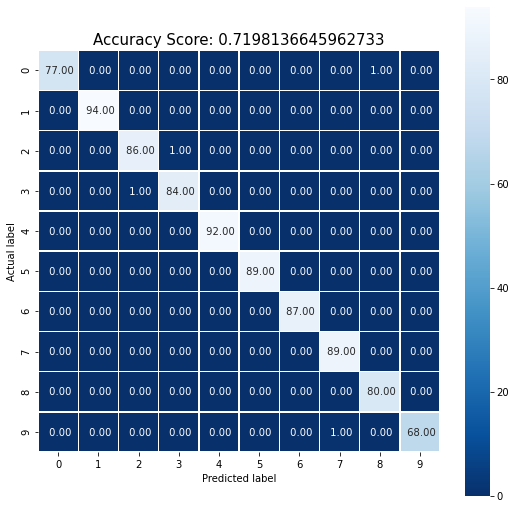

In [17]:
cm = confusion_matrix(y_test, predictions)
score = accuracy_score(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm[0:10,0:10], annot=True, fmt=" .2f", linewidth=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

In [18]:
from sklearn.metrics import log_loss
pred_proba = logisticReg.predict_proba(X_test)
log_loss(y_test,pred_proba)

1.2752783723184329